<a href="https://colab.research.google.com/github/emolinaperez/econometrics_mek/blob/week1/Week%201/python/Lab1_Econometrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Lab 1: Econometrics**

Import Required Libraries

In [ ]:
import os
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
import time
import os, os.path
import sys

Working Directory

In [ ]:
# working directory
os.getcwd()

'c:\\Users\\fuent\\OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey\\cursos\\Econometrics\\econometrics_mek\\Week 1\\python'

Load and Explore the Data

In [ ]:
# Load the data (modify file type and name as needed)
data_t1 = pd.read_csv("../data/example.csv")

let's check which type of object data is, we can use the function class:

In [ ]:
data_t1.__class__

pandas.core.frame.DataFrame

let's see the first rows in this data.frame

In [ ]:
data_t1.head()

,gender,educ,age,caruse,fast,unsafe,limit,offense,policy,contrib,limwar,accept,sig
0,0.0,4.0,43.0,18.0,4.0,13.0,19.0,19.0,17.0,21.0,10.0,32,4.653246
1,1.0,5.0,50.0,12.0,4.0,18.0,21.0,18.0,26.0,13.0,11.0,28,4.653246
2,0.0,5.0,25.0,18.0,3.0,11.0,14.0,18.0,19.0,16.0,10.0,20,4.653246
3,0.0,2.0,38.0,16.0,5.0,15.0,19.0,15.0,30.0,18.0,11.0,18,4.653246
4,0.0,6.0,60.0,12.0,5.0,13.0,17.0,17.0,26.0,23.0,10.0,25,4.653246


how many rows and columns my data has?

In [ ]:
data_t1.shape

(272, 13)

let's get summary statistics for all variables

In [ ]:
data_t1.describe()

,gender,educ,age,caruse,fast,unsafe,limit,offense,policy,contrib,limwar,accept,sig
count,271.000000,268.000000,270.000000,264.000000,271.000000,270.000000,268.000000,261.000000,268.000000,269.000000,271.000000,272.000000,272.000000
mean,0.239852,4.011194,45.988889,14.098485,3.767528,12.833333,17.779851,16.544061,20.552239,16.754647,9.309963,24.183824,4.653246
std,0.427783,1.299620,13.760426,3.758610,0.970594,3.204029,2.635121,4.564387,4.943224,4.010158,1.662175,6.616765,0.000000
min,0.000000,1.000000,21.000000,5.000000,1.000000,0.000000,11.000000,6.000000,6.000000,5.000000,7.000000,8.000000,4.653246
25%,0.000000,3.000000,35.000000,11.000000,3.000000,11.000000,16.000000,14.000000,17.000000,14.000000,8.000000,20.000000,4.653246
50%,0.000000,4.000000,45.000000,14.000000,4.000000,13.000000,18.000000,17.000000,21.000000,17.000000,10.000000,25.000000,4.653246
75%,0.000000,5.000000,55.750000,17.000000,4.000000,15.000000,19.000000,19.000000,24.000000,20.000000,10.000000,29.000000,4.653246
max,1.000000,6.000000,83.000000,22.000000,5.000000,20.000000,28.000000,29.000000,30.000000,25.000000,14.000000,40.000000,4.653246


lets see a histogram of these variables

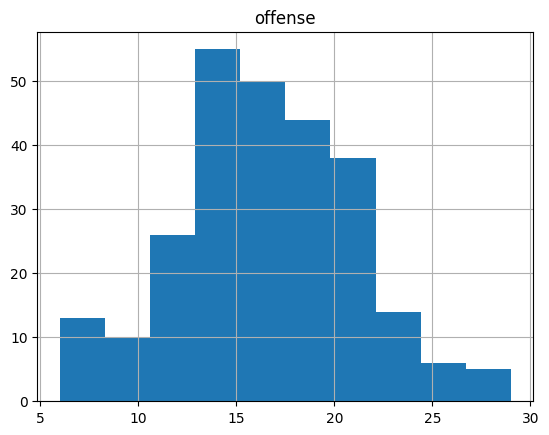

In [ ]:
data_t1.hist(column=['offense'])
plt.show()

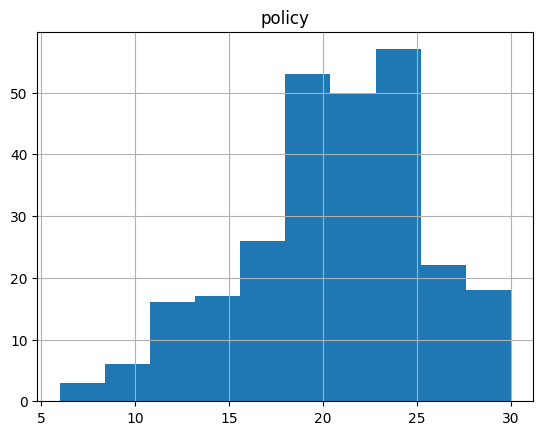

In [ ]:
data_t1.hist(column=['policy'])
plt.show()

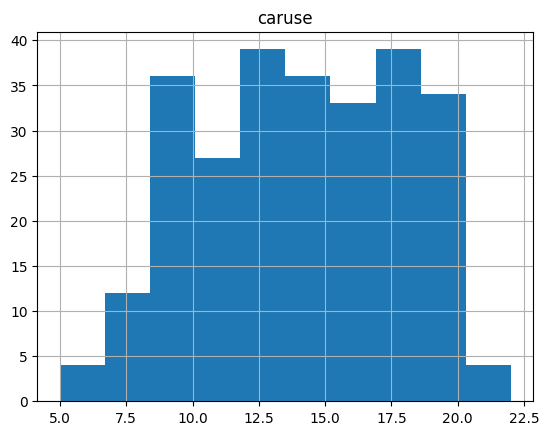

In [ ]:
data_t1.hist(column=['caruse'])
plt.show()

what about scatter plots

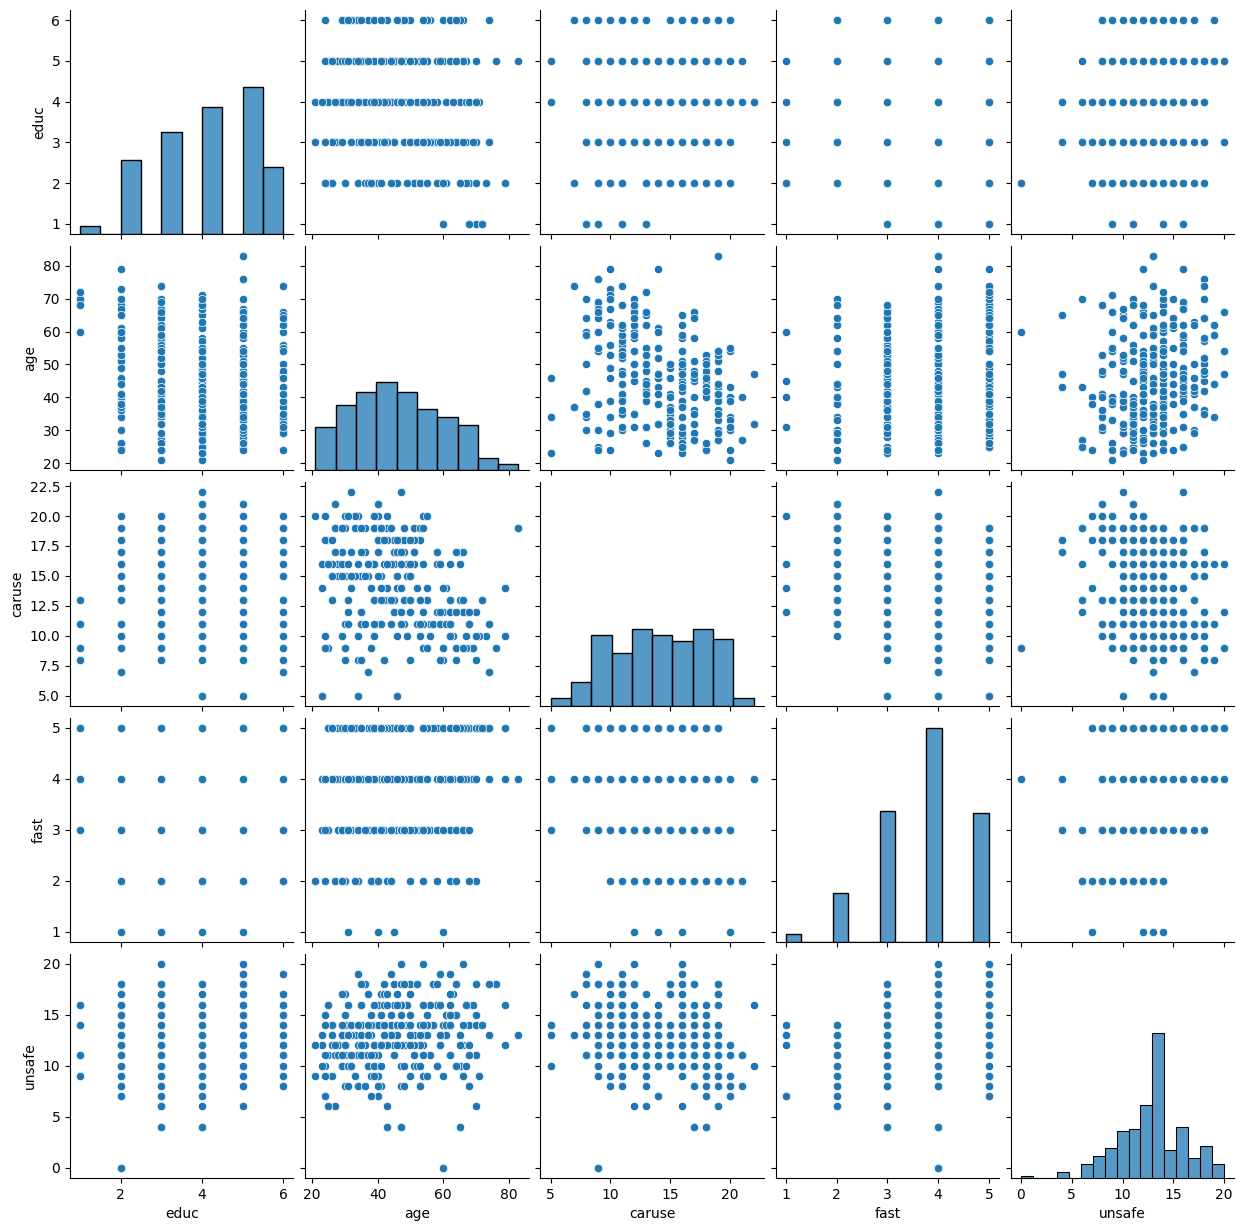

In [ ]:
sns.pairplot(data_t1[['educ', 'age', 'caruse', 'fast', 'unsafe']])
plt.show()

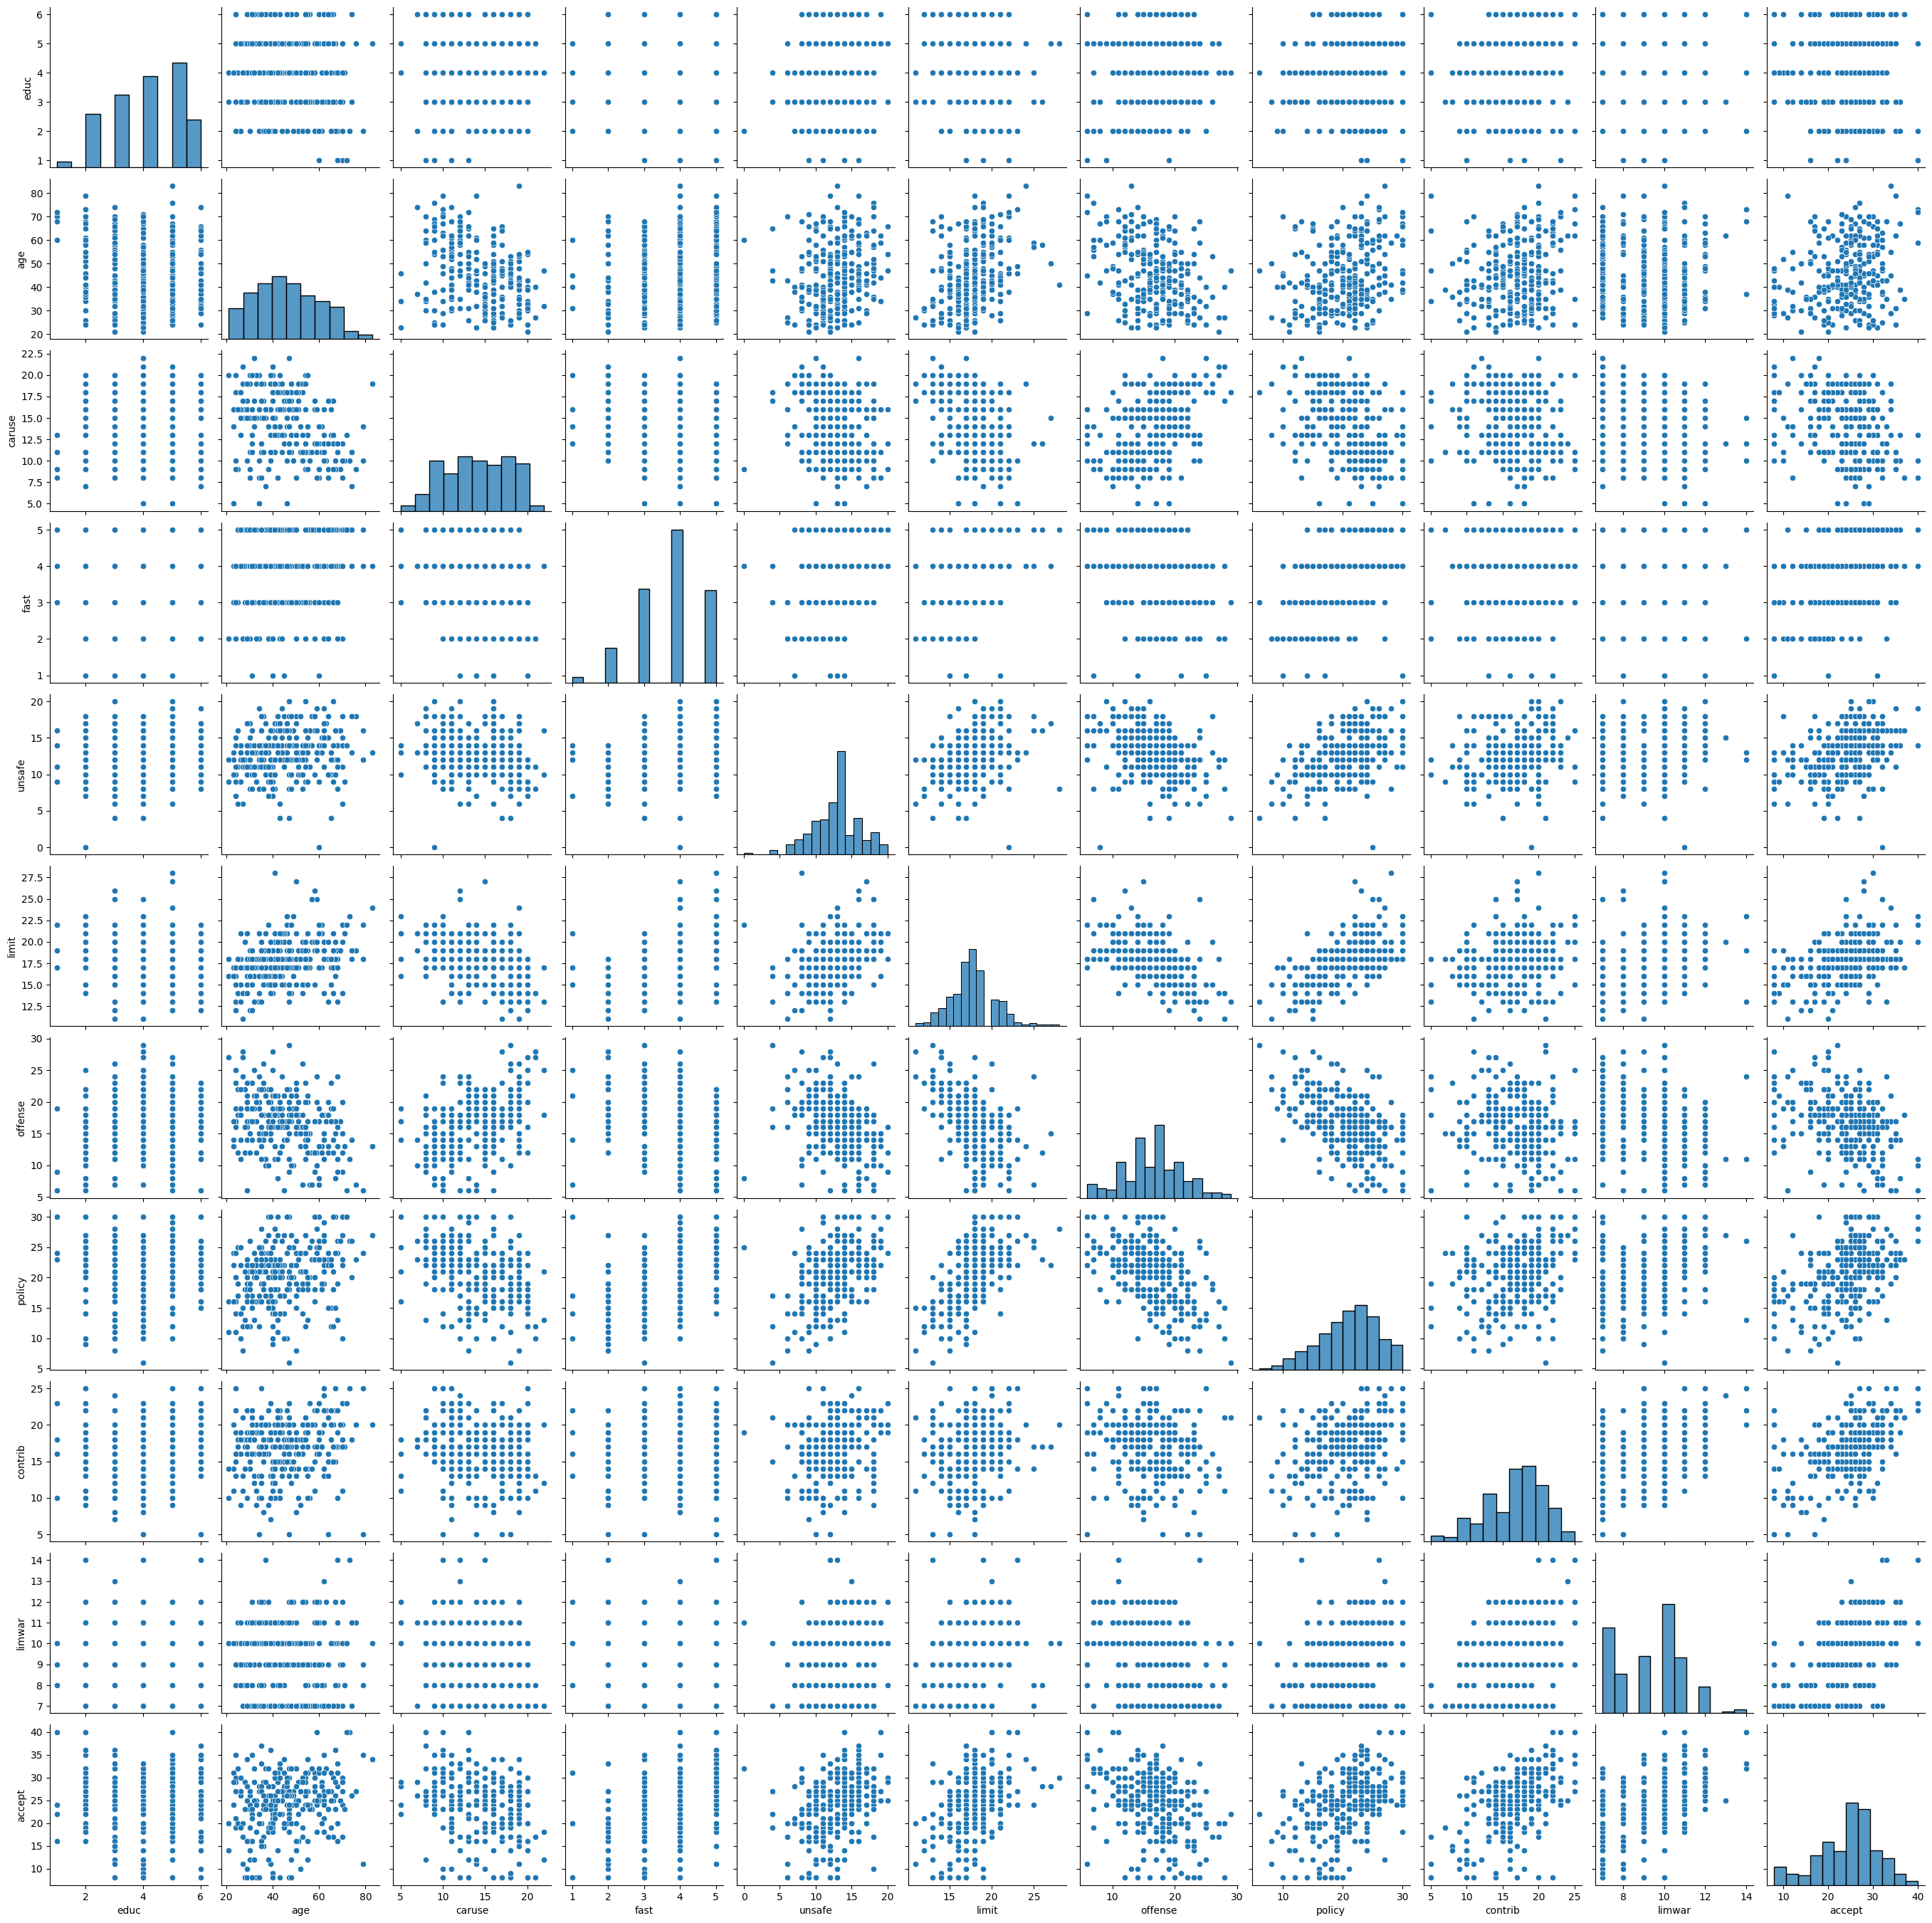

In [ ]:
sns.pairplot(data_t1[['educ', 'age', 'caruse', 'fast', 'unsafe', 'limit', 'offense', 'policy', 'contrib', 'limwar', 'accept']])
plt.show()

ok, enough with the graphics let's get back to business, let's run a regression:

In [ ]:
X = data_t1[['gender', 'educ', 'age', 'caruse', 'fast', 'unsafe', 'limit', 'offense']]
X = sm.add_constant(X)
Y = data_t1['accept']

# ommit na
X = X.dropna()
Y = Y.loc[X.index]

In [ ]:
# Fit the myfirstRregression
myfirstRregression = sm.OLS(Y, X).fit()

# Display model summary
print(myfirstRregression.summary())

                            OLS Regression Results                            
Dep. Variable:                 accept   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     11.50
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           9.25e-14
Time:                        16:25:34   Log-Likelihood:                -767.03
No. Observations:                 245   AIC:                             1552.
Df Residuals:                     236   BIC:                             1584.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3740      4.831      2.561      0.0

cool, do you want to know how long it took to run this regression? let's check it out

In [ ]:
start_time = time.time()
myfirstRregression = sm.OLS(Y, X).fit()
end_time = time.time()

print(f"Execution time: {end_time - start_time} seconds")

Execution time: 0.001004934310913086 seconds


well it says this was almost zero!, system.time is a useful function to compare options when programming and design efficient code of coruse running lm by itself gives you litle information, let's get more information of this regression,  first let's save the regression as an object

let's check which type of object this is

In [ ]:
myfirstRregression.__class__

statsmodels.regression.linear_model.RegressionResultsWrapper

ok, give me more information

In [ ]:
myfirstRregression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 accept   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     11.50
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           9.25e-14
Time:                        16:25:34   Log-Likelihood:                -767.03
No. Observations:                 245   AIC:                             1552.
Df Residuals:                     236   BIC:                             1584.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3740      4.831      2.561      0.011       2.857      21.891
gender         0.9754      0.929      1.050      0.295      -0.854       2.805
educ          -0.0281      0.289     -0.097      0.923      -0.598       0.542
age            0.0288      0.031      0.922      0.357      -0.033       0.090
caruse        -0.1457      0.111     -1.312      0.191      -0.365       0.073
fast           1.2875      0.459      2.803      0.005       0.382       2.193
unsafe         0.2055      0.131      1.571      0.117      -0.052       0.463
limit          0.4370      0.188      2.328      0.021       0.067       0.807
offense       -0.1724      0.103     -1.670      0.096      -0.376       0.031
==============================================================================
Omnibus:                        6.609   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.631
Skew:                          -0.403   Prob(JB):                       0.0363
Kurtosis:                       3.008   Cond. No.                         760.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ok, now let's access these data directly, first let's check which data is inside "my.first.Rregression"

In [ ]:
print(dir(myfirstRregression))

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abat_diagonal', '_cache', '_data_attr', '_data_in_cache', '_get_robustcov_results', '_get_wald_nonlinear', '_is_nested', '_transform_predict_exog', '_use_t', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'diagn', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'info_crit

Nice, so let's save each independent piece in an object:

In [ ]:
myCoef = myfirstRregression.params
myCoef

const      12.373981
gender      0.975417
educ       -0.028080
age         0.028772
caruse     -0.145748
fast        1.287505
unsafe      0.205457
limit       0.436976
offense    -0.172356
dtype: float64

In [ ]:
myCoef.__class__

pandas.core.series.Series

In [ ]:
myCoef["gender"]

np.float64(0.9754166446995207)

Ok, let's get all the other stuff we typically need:

In [ ]:
# residual sum of squares
mySSR = myfirstRregression.ssr
mySSR

np.float64(7516.5199098761195)

In [ ]:
# log likelihood statistic
myLL = myfirstRregression.llf
myLL

np.float64(-767.030979999588)

In [ ]:
# degrees of fredom
myDegreesOfFreedom = myfirstRregression.df_resid
myDegreesOfFreedom

np.float64(236.0)

In [ ]:
# vector of fitted values
myYhat = myfirstRregression.fittedvalues
myYhat

0      23.724114
1      27.820933
2      19.467201
3      26.315756
4      25.789828
         ...    
266    29.810201
267    23.021534
268    18.552271
269    24.947129
270    23.330448
Length: 245, dtype: float64

In [ ]:
# vector of residuals
myResid = myfirstRregression.resid
myResid

0       8.275886
1       0.179067
2       0.532799
3      -8.315756
4      -0.789828
         ...    
266    10.189799
267     7.978466
268    -6.552271
269    10.052871
270    -2.330448
Length: 245, dtype: float64

In [ ]:
# sigma

# The ** 0.5 operation in Python calculates the square root of a value
# myfirstRregression.scale represents the residual
myS = (myfirstRregression.scale)** 0.5
myS

np.float64(5.6435503572723)

In [ ]:
# R-squared
myRSquared = myfirstRregression.rsquared
myRSquared

np.float64(0.2804279974024766)

In [ ]:
# variance-covariance matrix of
myCovMatrix =myfirstRregression.cov_params()
myCovMatrix

,const,gender,educ,age,caruse,fast,unsafe,limit,offense
const,23.338573,0.016911,-0.254429,-0.040464,-0.205259,-0.348040,-0.123415,-0.545650,-0.290811
gender,0.016911,0.862616,-0.032001,0.007585,0.008872,-0.051144,-0.010676,-0.018769,0.006001
educ,-0.254429,-0.032001,0.083698,-0.000188,-0.002763,0.005195,-0.005853,0.004165,-0.002815
age,-0.040464,0.007585,-0.000188,0.000973,0.000663,0.000836,-0.000055,-0.001420,0.000489
caruse,-0.205259,0.008872,-0.002763,0.000663,0.012343,-0.002518,0.002019,0.002066,-0.002605
fast,-0.348040,-0.051144,0.005195,0.000836,-0.002518,0.211045,-0.013926,-0.023706,0.008573
unsafe,-0.123415,-0.010676,-0.005853,-0.000055,0.002019,-0.013926,0.017095,-0.003762,0.001324
limit,-0.545650,-0.018769,0.004165,-0.001420,0.002066,-0.023706,-0.003762,0.035224,0.004946
offense,-0.290811,0.006001,-0.002815,0.000489,-0.002605,0.008573,0.001324,0.004946,0.010655


In [ ]:
# Akaike information criterion
myaic = myfirstRregression.aic
myaic

np.float64(1552.061959999176)

In [ ]:
def my_first_function(dependent_var, independent_vars):
    X = data_t1[independent_vars]
    X = sm.add_constant(X)
    Y = data_t1[dependent_var]

    # ommit na
    X = X.dropna()
    Y = Y.loc[X.index]

    # Fit the linear model
    model = sm.OLS(Y, X).fit()

    # Extract required metrics
    my_SSR = model.ssr  # Residual Sum of Squares
    my_LL = model.llf  # Log-likelihood
    my_DegreesOfFreedom = model.df_resid  # Degrees of freedom
    my_RSquared = model.rsquared  # R-squared
    my_AIC = model.aic  # Akaike Information Criterion

    # Organize results into a DataFrame
    results = pd.DataFrame({
        "SSR": [my_SSR],
        "LL": [my_LL],
        "DF": [my_DegreesOfFreedom],
        "RSquared": [my_RSquared],
        "AIC": [my_AIC]
    })

    return results

since we have defined this function, now we can use it:
 the function has two arguments:
 the first argument indicates the dependent variable
 the second arugment indicates the independent variables
let's try this example:

In [ ]:
my_first_function("accept", ["gender", "educ", "age", "caruse", "fast", "unsafe", "limit", "offense"])

,SSR,LL,DF,RSquared,AIC
0,7516.51991,-767.03098,236.0,0.280428,1552.06196


let's try this other example

In [ ]:
my_first_function("accept", ["gender","educ","age","caruse"])

,SSR,LL,DF,RSquared,AIC
0,9478.286094,-833.696109,254.0,0.150216,1677.392218


interesting, can we do this over all possible specifications for the data set we have?
let's generate a table with all possible combinations

In [ ]:
# Generate all combinations of variables
all_vars = data_t1.columns.tolist()

independent_var_combinations = []

for r in range(1, len(all_vars) + 1):
    independent_var_combinations.extend(combinations(all_vars, r))

In [ ]:
independent_var_combinations

[('gender',),
 ('educ',),
 ('age',),
 ('caruse',),
 ('fast',),
 ('unsafe',),
 ('limit',),
 ('offense',),
 ('policy',),
 ('contrib',),
 ('limwar',),
 ('accept',),
 ('sig',),
 ('gender', 'educ'),
 ('gender', 'age'),
 ('gender', 'caruse'),
 ('gender', 'fast'),
 ('gender', 'unsafe'),
 ('gender', 'limit'),
 ('gender', 'offense'),
 ('gender', 'policy'),
 ('gender', 'contrib'),
 ('gender', 'limwar'),
 ('gender', 'accept'),
 ('gender', 'sig'),
 ('educ', 'age'),
 ('educ', 'caruse'),
 ('educ', 'fast'),
 ('educ', 'unsafe'),
 ('educ', 'limit'),
 ('educ', 'offense'),
 ('educ', 'policy'),
 ('educ', 'contrib'),
 ('educ', 'limwar'),
 ('educ', 'accept'),
 ('educ', 'sig'),
 ('age', 'caruse'),
 ('age', 'fast'),
 ('age', 'unsafe'),
 ('age', 'limit'),
 ('age', 'offense'),
 ('age', 'policy'),
 ('age', 'contrib'),
 ('age', 'limwar'),
 ('age', 'accept'),
 ('age', 'sig'),
 ('caruse', 'fast'),
 ('caruse', 'unsafe'),
 ('caruse', 'limit'),
 ('caruse', 'offense'),
 ('caruse', 'policy'),
 ('caruse', 'contrib'),
 ('

In [ ]:
# Fit models for all combinations
results = []

for combo in independent_var_combinations:
    try:
        # Run the regression for the current combination of variables
        result = my_first_function("accept", list(combo))

        # Add the combination as a column to the result DataFrame
        result["combination"] = [", ".join(combo)]

        # Append the result DataFrame to the results list
        results.append(result)
    except Exception as e:
        print(f"Error with combination {combo}: {e}")

# Combine all results into a single DataFrame
if results:
    results_df = pd.concat(results, ignore_index=True)
else:
    results_df = pd.DataFrame()


In [ ]:
results_df.head(20)

,SSR,LL,DF,RSquared,AIC,combination
0,1.144801e+04,-891.770141,269.0,3.393884e-02,1787.540282,gender
1,1.156282e+04,-884.726986,266.0,2.870263e-03,1773.453972,educ
2,1.113346e+04,-885.217330,268.0,5.272944e-02,1774.434660,age
3,1.047733e+04,-860.494469,262.0,9.050891e-02,1724.988939,caruse
4,9.919785e+03,-872.355066,269.0,1.633709e-01,1748.710132,fast
5,1.022117e+04,-873.675583,268.0,1.192781e-01,1751.351166,unsafe
6,9.236440e+03,-854.625449,266.0,1.974105e-01,1713.250899,limit
7,1.001260e+04,-846.286842,259.0,1.346052e-01,1696.573684,offense
8,9.101772e+03,-852.657345,266.0,2.162587e-01,1709.314689,policy
9,8.494073e+03,-846.043947,267.0,2.833297e-01,1696.087894,contrib


In [ ]:
# Find the best model by R-Squared
best_model = results_df.loc[results_df['RSquared'].idxmax()]
print("Best Model:", best_model)

Best Model: SSR                     0.0
LL              8287.252259
DF                    270.0
RSquared                1.0
AIC           -16570.504517
combination          accept
Name: 11, dtype: object
